         Date Product_Category  Sales_Volume      Price  Promotion  \
0  2022-01-01        Household          1583   5.190661          0   
1  2022-01-02    Personal Care          1103   8.949596          0   
2  2022-01-03            Dairy           455   4.867987          0   
3  2022-01-04    Personal Care          1107  16.968596          1   
4  2022-01-05    Personal Care          1447   4.309673          1   

  Store_Location  Weekday  Supplier_Cost  Replenishment_Lead_Time  Stock_Level  
0          Urban        5       9.299281                        9          207  
1          Urban        6      13.274109                        5          253  
2          Rural        0      13.302265                        9          245  
3          Urban        1      10.056158                        5          265  
4          Rural        2       3.562862                        8          334  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 

C:\Users\Ankit Kumar Singh\AppData\Local\Temp\ipykernel_34104\4171191572.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cat['Profit'] = df_cat['Profit'].fillna(method='ffill')


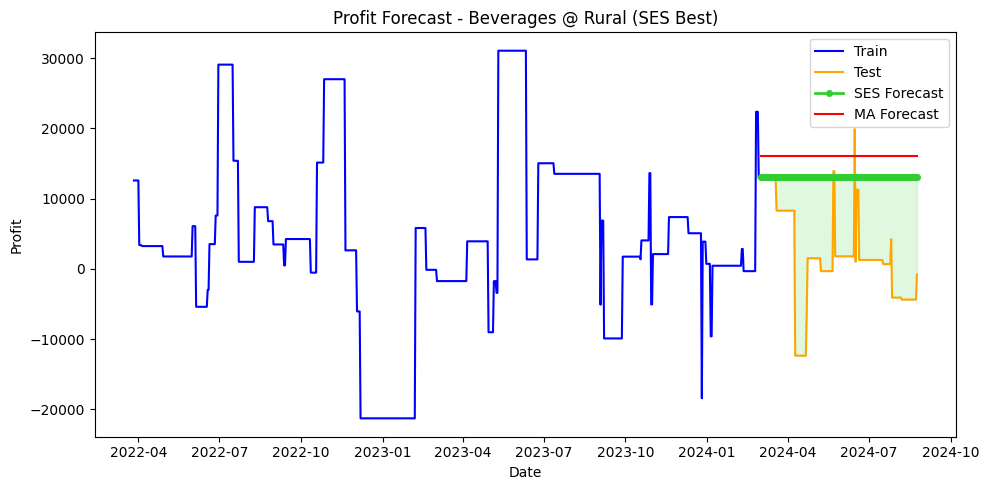

C:\Users\Ankit Kumar Singh\AppData\Local\Temp\ipykernel_34104\4171191572.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cat['Profit'] = df_cat['Profit'].fillna(method='ffill')


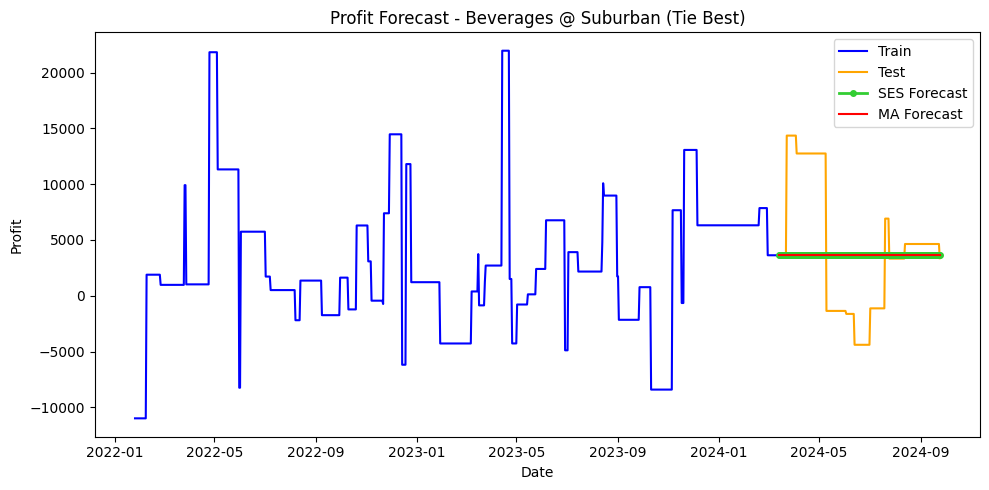

C:\Users\Ankit Kumar Singh\AppData\Local\Temp\ipykernel_34104\4171191572.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cat['Profit'] = df_cat['Profit'].fillna(method='ffill')


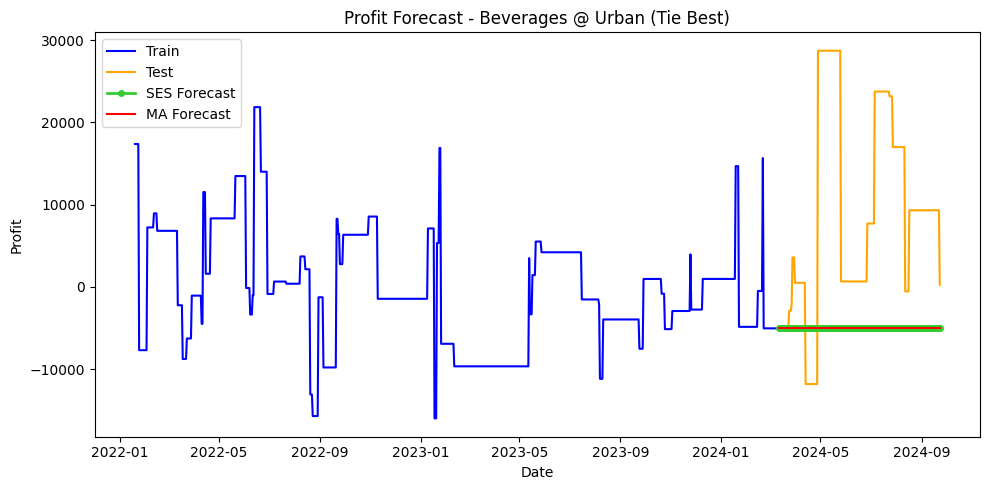

C:\Users\Ankit Kumar Singh\AppData\Local\Temp\ipykernel_34104\4171191572.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cat['Profit'] = df_cat['Profit'].fillna(method='ffill')


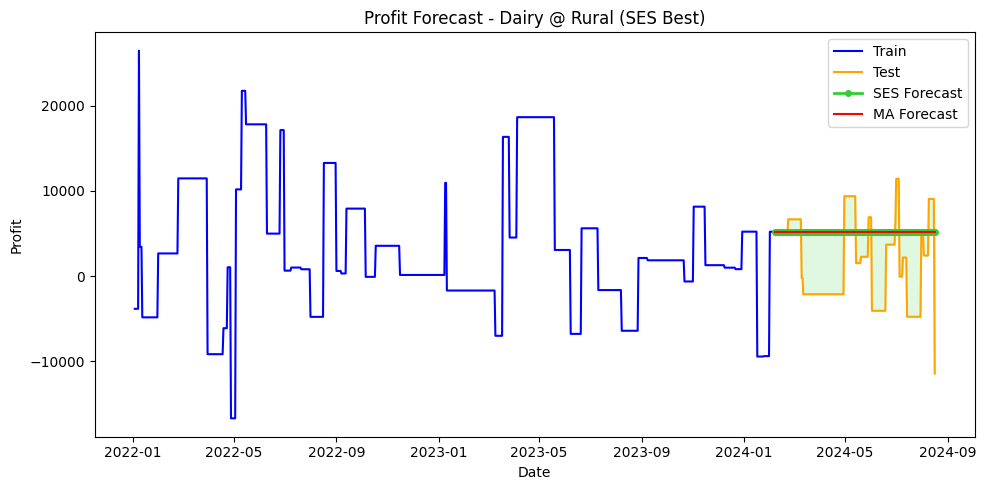

C:\Users\Ankit Kumar Singh\AppData\Local\Temp\ipykernel_34104\4171191572.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cat['Profit'] = df_cat['Profit'].fillna(method='ffill')


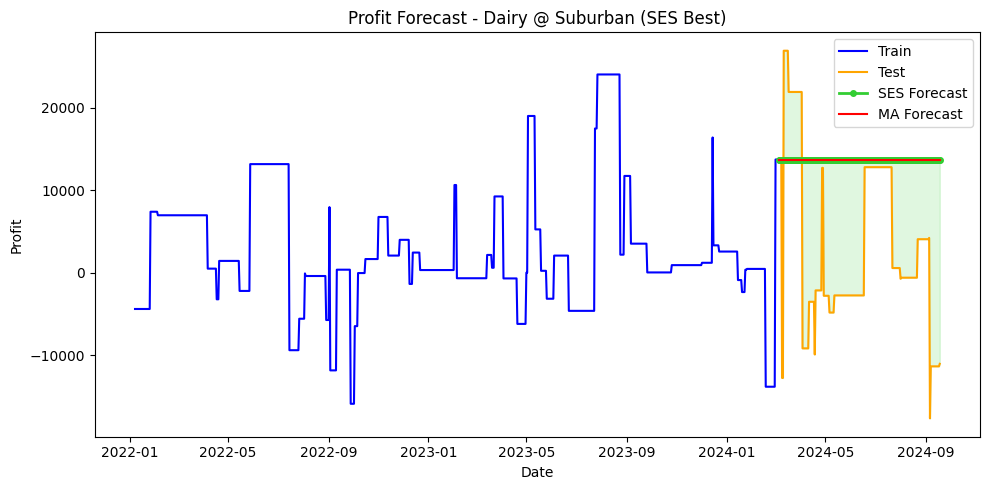

C:\Users\Ankit Kumar Singh\AppData\Local\Temp\ipykernel_34104\4171191572.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cat['Profit'] = df_cat['Profit'].fillna(method='ffill')


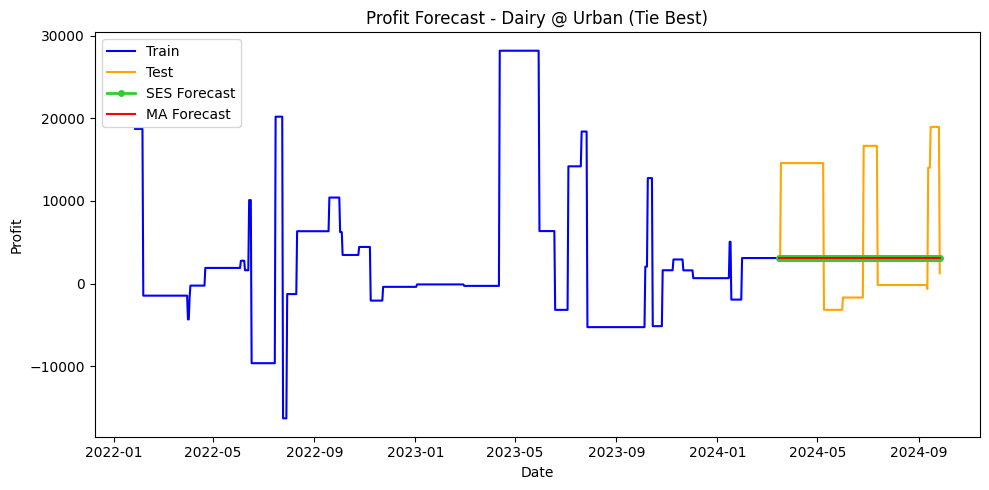

C:\Users\Ankit Kumar Singh\AppData\Local\Temp\ipykernel_34104\4171191572.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cat['Profit'] = df_cat['Profit'].fillna(method='ffill')


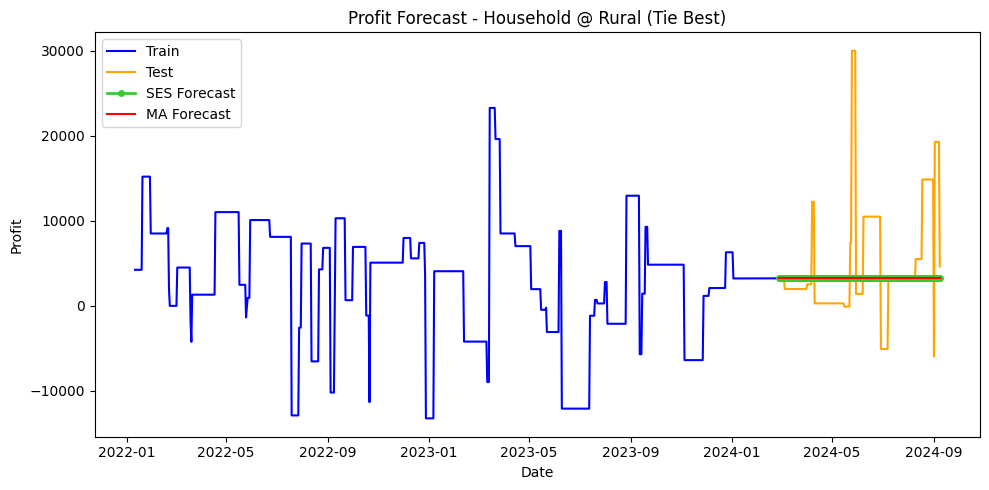

C:\Users\Ankit Kumar Singh\AppData\Local\Temp\ipykernel_34104\4171191572.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cat['Profit'] = df_cat['Profit'].fillna(method='ffill')


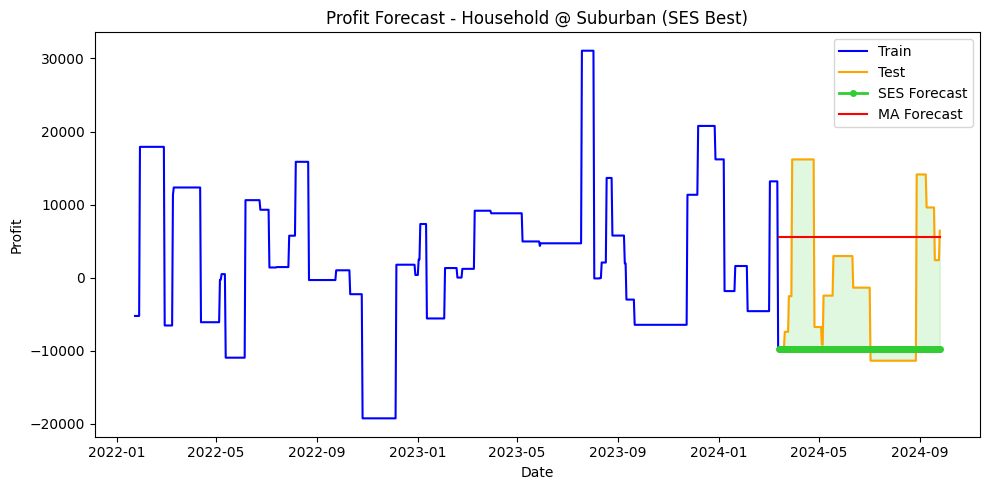

C:\Users\Ankit Kumar Singh\AppData\Local\Temp\ipykernel_34104\4171191572.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cat['Profit'] = df_cat['Profit'].fillna(method='ffill')


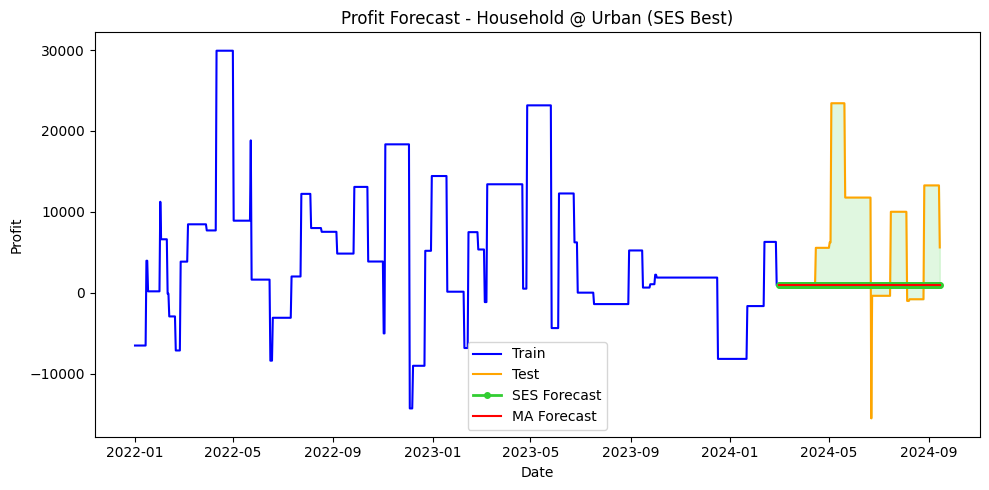

C:\Users\Ankit Kumar Singh\AppData\Local\Temp\ipykernel_34104\4171191572.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cat['Profit'] = df_cat['Profit'].fillna(method='ffill')


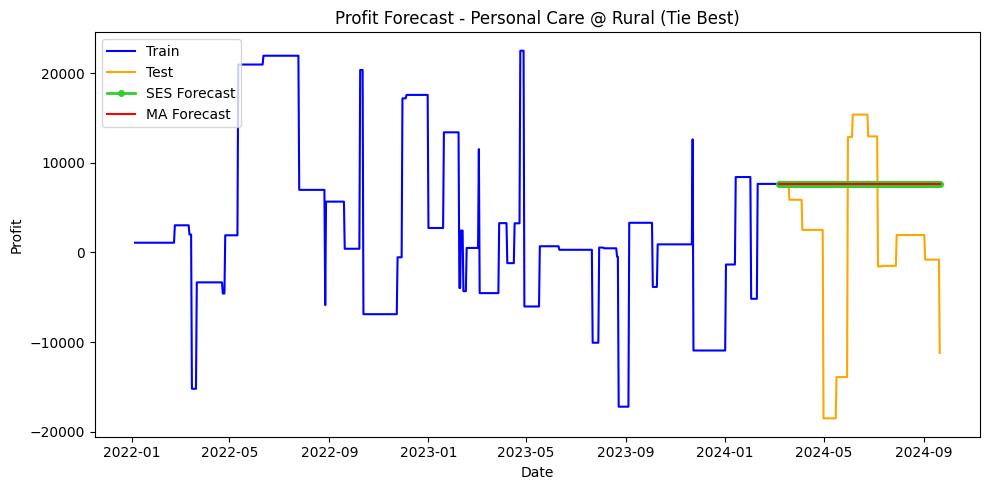

C:\Users\Ankit Kumar Singh\AppData\Local\Temp\ipykernel_34104\4171191572.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cat['Profit'] = df_cat['Profit'].fillna(method='ffill')


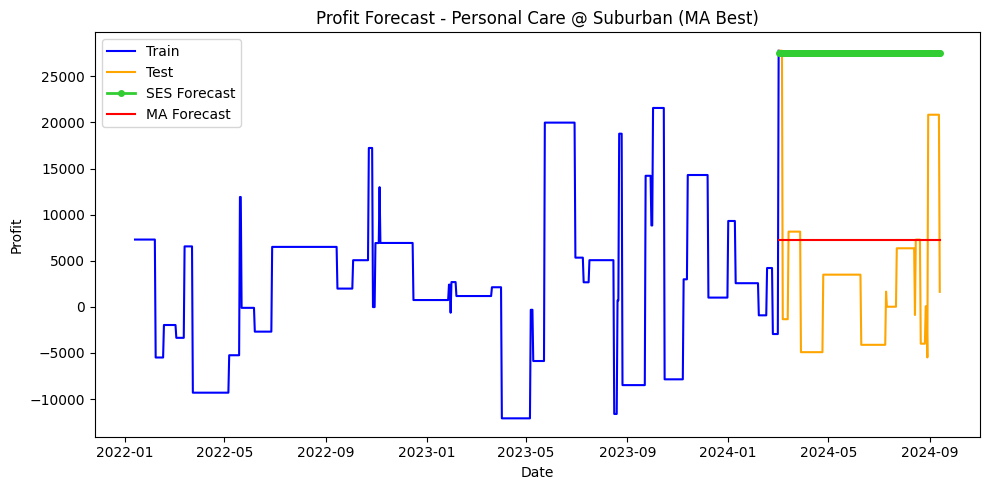

C:\Users\Ankit Kumar Singh\AppData\Local\Temp\ipykernel_34104\4171191572.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cat['Profit'] = df_cat['Profit'].fillna(method='ffill')


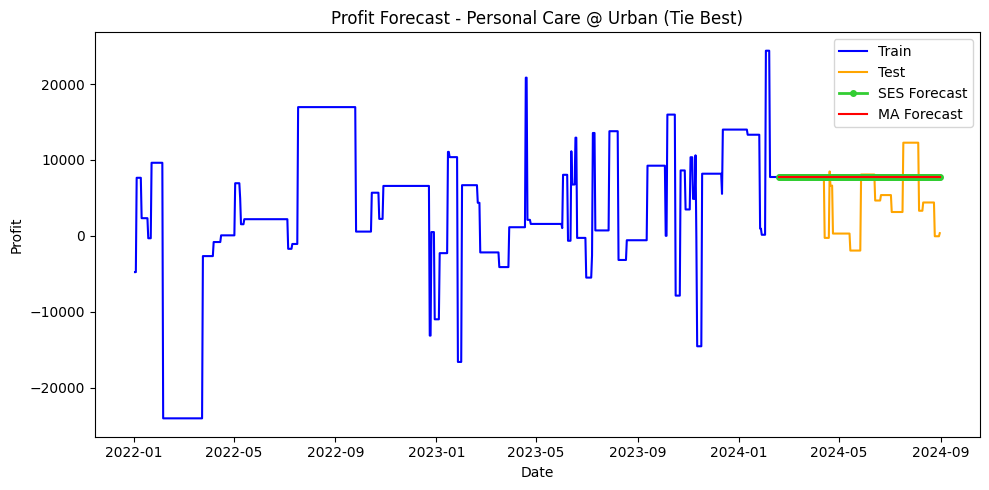

C:\Users\Ankit Kumar Singh\AppData\Local\Temp\ipykernel_34104\4171191572.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cat['Profit'] = df_cat['Profit'].fillna(method='ffill')


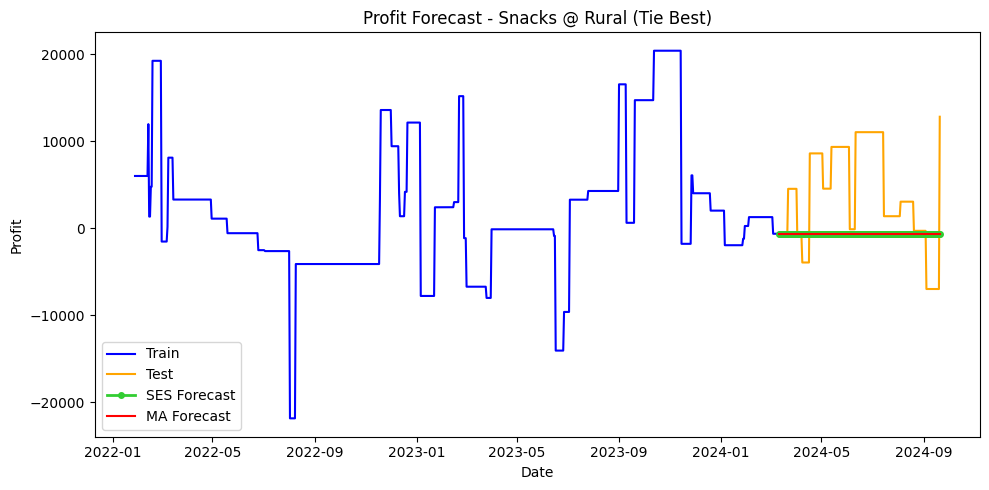

C:\Users\Ankit Kumar Singh\AppData\Local\Temp\ipykernel_34104\4171191572.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cat['Profit'] = df_cat['Profit'].fillna(method='ffill')


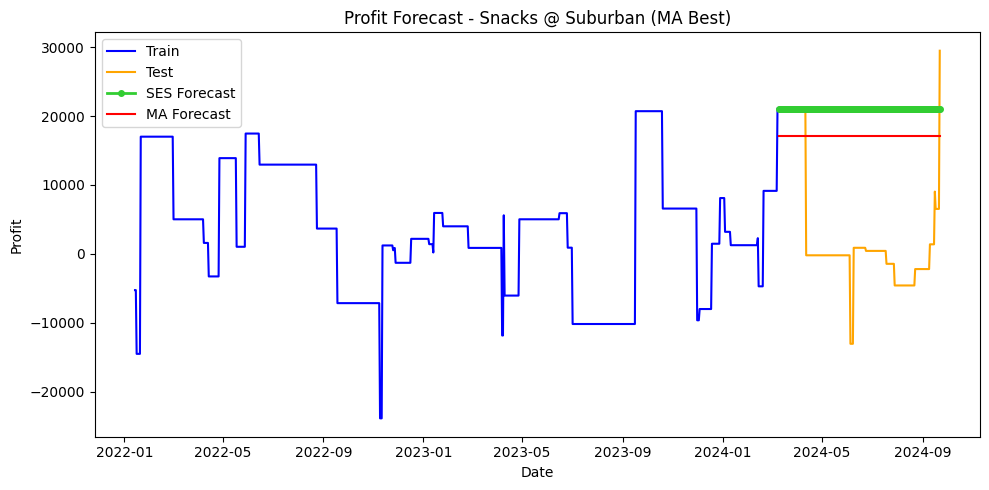

C:\Users\Ankit Kumar Singh\AppData\Local\Temp\ipykernel_34104\4171191572.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cat['Profit'] = df_cat['Profit'].fillna(method='ffill')


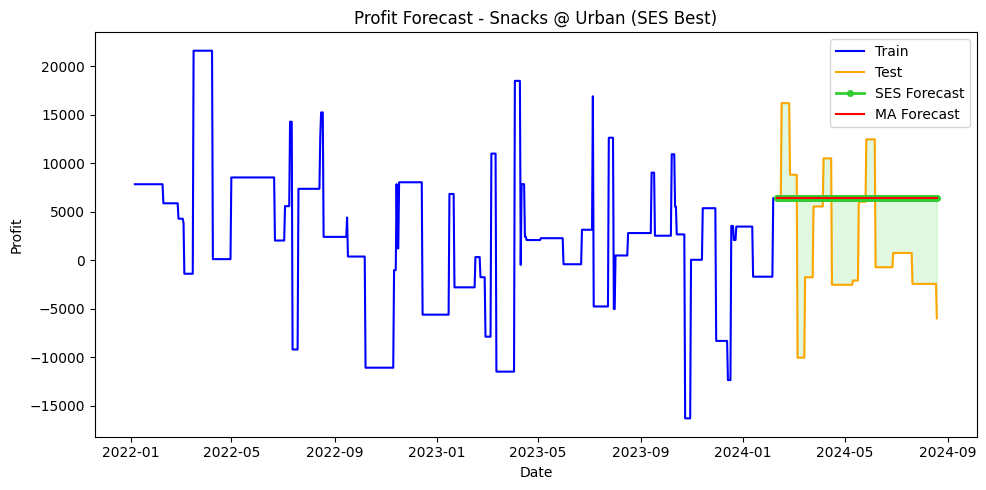

Forecast metrics saved to 'forecast_metrics.xlsx'
Individual plots saved in 'forecast_plots/'
All plots combined in 'forecast_report.pdf'


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from df_setup import load_df
from matplotlib.backends.backend_pdf import PdfPages

# --- Step 1: Load & prepare ---
df = load_df()  # from your df_setup.py
df['Profit'] = (df['Price'] - df['Supplier_Cost']) * df['Sales_Volume']

results = []

# --- Create folder for plots ---
plot_folder = "forecast_plots"
os.makedirs(plot_folder, exist_ok=True)

# --- PDF file ---
pdf_file = "forecast_report.pdf"
pdf = PdfPages(pdf_file)

# --- Step 2: Loop over each Product_Category & Store_Location ---
for category in df['Product_Category'].unique():
    for store in df['Store_Location'].unique():

        df_cat = df[(df['Product_Category'] == category) & (df['Store_Location'] == store)].copy()
        df_cat = df_cat.sort_values('Date').set_index('Date')

        # Ensure daily frequency
        df_cat = df_cat.asfreq('D')

        # Fill missing profit values
        df_cat['Profit'] = df_cat['Profit'].fillna(method='ffill')

        # Skip if too short
        if len(df_cat) < 10:
            continue

        # Train/Test split
        train_size = int(len(df_cat) * 0.8)
        train, test = df_cat.iloc[:train_size], df_cat.iloc[train_size:]

        # --- Moving Average ---
        window = 3
        ma_last_value = train['Profit'].rolling(window=window).mean().iloc[-1]
        ma_forecast = pd.Series([ma_last_value] * len(test), index=test.index)

        # --- SES ---
        ses_model = SimpleExpSmoothing(train['Profit'], initialization_method='estimated')
        ses_fit = ses_model.fit()
        ses_forecast = ses_fit.forecast(len(test))

        # --- Valid indexes for metrics ---
        valid_idx_ma = test['Profit'].notna() & ma_forecast.notna()
        valid_idx_ses = test['Profit'].notna() & ses_forecast.notna()

        # --- Metrics ---
        ma_mae = mean_absolute_error(test['Profit'][valid_idx_ma], ma_forecast[valid_idx_ma])
        ma_rmse = np.sqrt(mean_squared_error(test['Profit'][valid_idx_ma], ma_forecast[valid_idx_ma]))

        ses_mae = mean_absolute_error(test['Profit'][valid_idx_ses], ses_forecast[valid_idx_ses])
        ses_rmse = np.sqrt(mean_squared_error(test['Profit'][valid_idx_ses], ses_forecast[valid_idx_ses]))

        # --- Pick winner ---
        if ses_mae < ma_mae:
            best_method = "SES"
        elif ma_mae < ses_mae:
            best_method = "MA"
        else:
            best_method = "Tie"

        # Store results
        results.append({
            'Product_Category': category,
            'Store_Location': store,
            'MA_MAE': ma_mae,
            'MA_RMSE': ma_rmse,
            'SES_MAE': ses_mae,
            'SES_RMSE': ses_rmse,
            'Best_Method': best_method
        })

        # --- Plot ---
        plt.figure(figsize=(10, 5))
        plt.plot(train.index, train['Profit'], label='Train', color='blue')
        plt.plot(test.index, test['Profit'], label='Test', color='orange')

        # Make SES line thicker and brighter green
        plt.plot(test.index, ses_forecast, label='SES Forecast', color='limegreen', linewidth=2, marker='o', markersize=4)
        plt.plot(test.index, ma_forecast, label='MA Forecast', color='red', linewidth=1.5)

        # Highlight best method during forecast period only
        if best_method == "SES":
            plt.fill_between(test.index, ses_forecast, test['Profit'], color='limegreen', alpha=0.15)
        elif best_method == "Moving Average":
            plt.fill_between(test.index, ma_forecast, test['Profit'], color='red', alpha=0.15)

        plt.title(f"Profit Forecast - {category} @ {store} ({best_method} Best)")
        plt.xlabel('Date')
        plt.ylabel('Profit')
        plt.legend()
        plt.tight_layout()

        # Save individual PNG
        safe_filename = f"{category}_{store}_forecast.png".replace("/", "-").replace("\\", "-")
        plt.savefig(os.path.join(plot_folder, safe_filename), dpi=300)

        # Save plot to PDF
        pdf.savefig()

        # Show in Jupyter
        plt.show()

# --- Step 3: Save metrics ---
metrics_df = pd.DataFrame(results).sort_values(by='SES_MAE')
metrics_df.to_excel("forecast_metrics.xlsx", index=False)

# --- Close PDF ---
pdf.close()

print(f"Forecast metrics saved to 'forecast_metrics.xlsx'")
print(f"Individual plots saved in '{plot_folder}/'")
print(f"All plots combined in '{pdf_file}'")
